In [2]:
# Importamos los módulos a utilizar
from sklearn import datasets
import matplotlib.pyplot as plt

# Cargamos el dataset digits
digits = datasets.load_digits()

# Imprimimos las llaves y el DESCR de los datos
print(digits.keys())
print(digits.DESCR)

# Imprimimos la forma de digits
print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [3]:
# Importamos los módulos a utilizar
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Separamos nuestras entradas y las salidas del dataset
X = digits.data
y = digits.target

# Fraccionamos los datos para entrenar y luego probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instanciamos el modelo con k igual a 7
knn = KNeighborsClassifier(n_neighbors=7)

# Entrenamos el modelo
knn.fit(X_train, y_train)

# Imprimimos su exactitud
print(knn.score(X_test, y_test))

0.9833333333333333


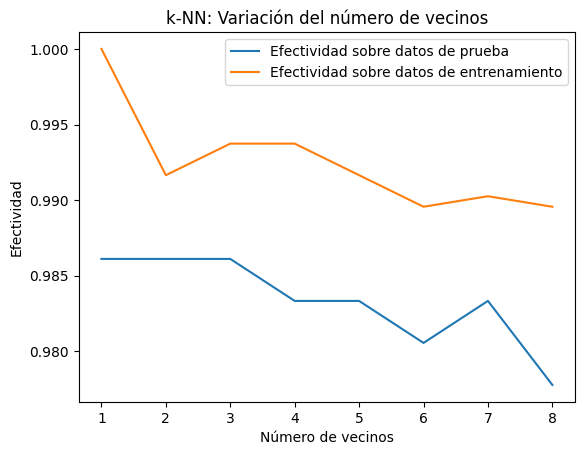

In [6]:
import numpy as np
#Creamos dos arrreglos para guardar la efectividad del modelo en función de la k
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Instanciamos el modelo para los distintos valores de k y guardamos su eficiencia
for i, k in enumerate(neighbors):
    # Instanciamos el modelo
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenamos el modelo con los datos de entrenamiento
    knn.fit(X_train,y_train)
    
    #Buscamos la eficacia en comparación a los datos de entrenamiento
    train_accuracy[i] = knn.score(X_train, y_train)

    #Ahora buscamos la eficacia del modelo sobre los datos de prueba
    test_accuracy[i] = knn.score(X_test, y_test)

# Generamos una gráfica de las eficacias contra los distintos valores de k
plt.title('k-NN: Variación del número de vecinos')
plt.plot(neighbors, test_accuracy, label = 'Efectividad sobre datos de prueba')
plt.plot(neighbors, train_accuracy, label = 'Efectividad sobre datos de entrenamiento')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Efectividad')
plt.show()